In [2]:
import numpy as np
import matplotlib.pyplot as plt
#!pip install kfda
from kfda import Kfda

(700,)
(700, 2)


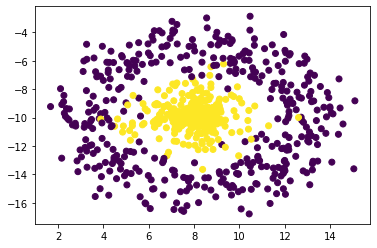

In [3]:
#part 2
labels = np.genfromtxt('labels.csv', delimiter=' ')
features = np.genfromtxt('features.csv', delimiter=' ')
print(labels.shape)
print(features.shape)
plt.scatter(features[:,0], features[:,1], c=labels[:])

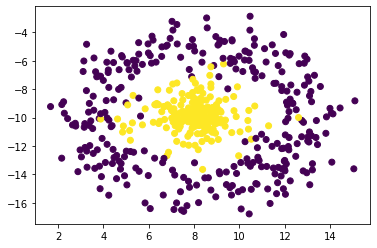

In [4]:
#part 3.1
#choose indexes
train_index = np.random.choice(range(features.shape[0]), 525, replace=False)
test_index = [i for i in range(700) if i not in train_index]

#training samples size = 75% of samples
training_set_features = features[train_index]
training_set_labels = labels[train_index]

plt.scatter(training_set_features[:,0], training_set_features[:,1], c=training_set_labels[:])

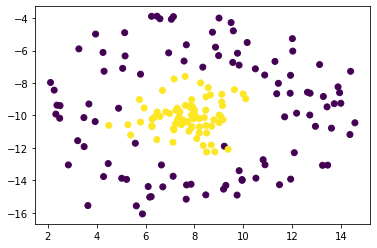

In [5]:
#testing samples size = 25 % of samples
testing_set_features = features[test_index]
testing_set_labels = labels[test_index]


plt.scatter(testing_set_features[:,0], testing_set_features[:,1], c=testing_set_labels[:])

In [14]:
#part 3.2
cls = Kfda(kernel='rbf', n_components=1, gamma=0.2)
cls.fit(training_set_features, training_set_labels)

#part 3.3
test_score = cls.score(testing_set_features, testing_set_labels)
train_score = cls.score(training_set_features, training_set_labels)

print(f'Test Score: {test_score}')
print(f'Train Score: {train_score}')

Test Score: 0.9771428571428571
Train Score: 0.9752380952380952


Average train Score: 0.9970690476190475
Average test Score: 0.8622380952380952


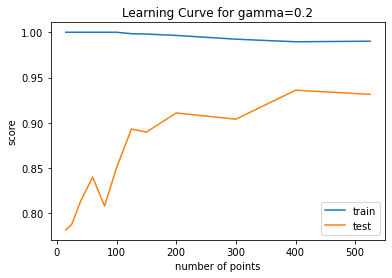

In [15]:
#part 4.1 gamma=0.2

#to store score
train_score = 0
test_score = 0
#to store Learning Curves
test_LC = []
train_LC = []

#choose gamma
gamma = 0.2
cls = Kfda(kernel='rbf', n_components=1, gamma = gamma)

number_of_points = np.array([15, 25, 40, 60, 80, 100, 125, 150, 200, 300, 400, 525])

for i in number_of_points:
    #reset the score list
    list_test_score = []
    list_train_score = []
    for j in range(0,10):
        #sample i random points from training set
        index = np.random.choice(range(training_set_features.shape[0]), i, replace=True)
        X_train = training_set_features[index]
        y_train = training_set_labels[index]
        
        #train
        cls.fit(X_train, y_train)
    
        #get score
        train_score = cls.score(X_train, y_train)
        test_score = cls.score(testing_set_features, testing_set_labels)
        #add score to list
        list_train_score.append(train_score)
        list_test_score.append(test_score)
    
    #add average of scores for to learning curve list for the plot
    train_LC.append(np.average(list_train_score))
    test_LC.append(np.average(list_test_score)) 

print(f'Average train Score: {np.average(train_LC)}')
print(f'Average test Score: {np.average(test_LC)}')

#plot    
plt.plot(number_of_points, train_LC, label ="train")
plt.plot(number_of_points, test_LC, label ="test")
plt.title(f'Learning Curve for gamma={gamma}')
plt.xlabel('number of points')
plt.ylabel('score')
plt.legend()
plt.show()

Average train Score: 0.9530900793650794
Average test Score: 0.9091904761904762


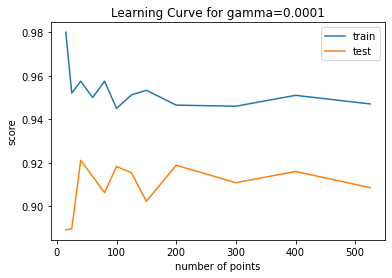

In [16]:
#part 4.2 gamma=0.0001

#to store score
train_score = 0
test_score = 0
#to store Learning Curves
test_LC = []
train_LC = []

#choose gamma
gamma = 0.0001
cls = Kfda(kernel='rbf', n_components=1, gamma = gamma)

for i in number_of_points:
    #reset the score list
    list_test_score = []
    list_train_score = []
    for j in range(0,10):
        #sample i random points from training set
        index = np.random.choice(range(training_set_features.shape[0]), i, replace=True)
        X_train = training_set_features[index]
        y_train = training_set_labels[index]
        
        #train
        cls.fit(X_train, y_train)
    
        #get score
        train_score = cls.score(X_train, y_train)
        test_score = cls.score(testing_set_features, testing_set_labels)
        #add score to list
        list_train_score.append(train_score)
        list_test_score.append(test_score)
    
    #add average of scores for to learning curve list for the plot
    train_LC.append(np.average(list_train_score))
    test_LC.append(np.average(list_test_score)) 

print(f'Average train Score: {np.average(train_LC)}')
print(f'Average test Score: {np.average(test_LC)}')

#plot    
plt.plot(number_of_points, train_LC, label ="train")
plt.plot(number_of_points, test_LC, label ="test")
plt.title(f'Learning Curve for gamma={gamma}')
plt.xlabel('number of points')
plt.ylabel('score')
plt.legend()
plt.show()

Average train Score: 0.9628517857142858
Average test Score: 0.9494285714285716


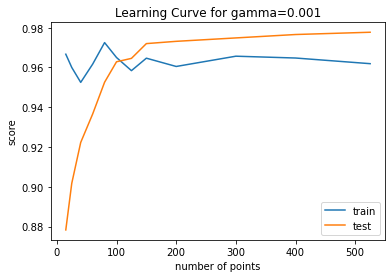

In [17]:
#part 4.2 gamma=0.001

#to store score
train_score = 0
test_score = 0
#to store Learning Curves
test_LC = []
train_LC = []

#choose gamma
gamma = 0.001
cls = Kfda(kernel='rbf', n_components=1, gamma = gamma)


for i in number_of_points:
    #reset the score list
    list_test_score = []
    list_train_score = []
    for j in range(0,10):
        #sample i random points from training set
        index = np.random.choice(range(training_set_features.shape[0]), i, replace=True)
        X_train = training_set_features[index]
        y_train = training_set_labels[index]
        
        #train
        cls.fit(X_train, y_train)
        
        #get score
        train_score = cls.score(X_train, y_train)
        test_score = cls.score(testing_set_features, testing_set_labels)
        #add score to list
        list_train_score.append(train_score)
        list_test_score.append(test_score)
    
    #add average of scores for to learning curve list for the plot
    train_LC.append(np.average(list_train_score))
    test_LC.append(np.average(list_test_score)) 

print(f'Average train Score: {np.average(train_LC)}')
print(f'Average test Score: {np.average(test_LC)}')

#plot    
plt.plot(number_of_points, train_LC, label ="train")
plt.plot(number_of_points, test_LC, label ="test")
plt.title(f'Learning Curve for gamma={gamma}')
plt.xlabel('number of points')
plt.ylabel('score')
plt.legend()
plt.show()

Average train Score: 0.9764005952380951
Average test Score: 0.9514761904761905


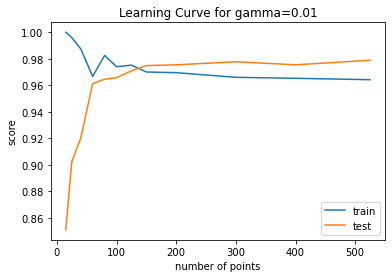

In [18]:
#part 4.2 gamma=0.01

#to store score
train_score = 0
test_score = 0
#to store Learning Curves
test_LC = []
train_LC = []

#choose gamma
gamma = 0.01
cls = Kfda(kernel='rbf', n_components=1, gamma = gamma)

for i in number_of_points:
    #reset the score list
    list_test_score = []
    list_train_score = []
    for j in range(0,10):
        #sample i random points from training set
        index = np.random.choice(range(training_set_features.shape[0]), i, replace=True)
        X_train = training_set_features[index]
        y_train = training_set_labels[index]
        
        #train
        cls.fit(X_train, y_train)
    
        #get score
        train_score = cls.score(X_train, y_train)
        test_score = cls.score(testing_set_features, testing_set_labels)
        #add score to list
        list_train_score.append(train_score)
        list_test_score.append(test_score)
    
    #add average of scores for to learning curve list for the plot
    train_LC.append(np.average(list_train_score))
    test_LC.append(np.average(list_test_score)) 

print(f'Average train Score: {np.average(train_LC)}')
print(f'Average test Score: {np.average(test_LC)}')

#plot    
plt.plot(number_of_points, train_LC, label ="train")
plt.plot(number_of_points, test_LC, label ="test")
plt.title(f'Learning Curve for gamma={gamma}')
plt.xlabel('number of points')
plt.ylabel('score')
plt.legend()
plt.show()

Average train Score: 0.9917418650793652
Average test Score: 0.8898095238095238


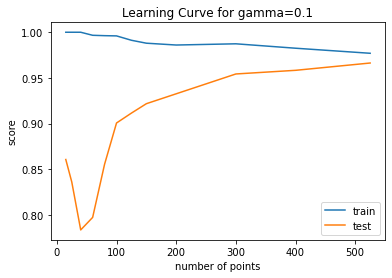

In [19]:
#part 4.2 gamma=0.1

#to store score
train_score = 0
test_score = 0
#to store Learning Curves
test_LC = []
train_LC = []

#choose gamma
gamma = 0.1
cls = Kfda(kernel='rbf', n_components=1, gamma = gamma)

for i in number_of_points:
    #reset the score list
    list_test_score = []
    list_train_score = []
    for j in range(0,10):
        #sample i random points from training set
        index = np.random.choice(range(training_set_features.shape[0]), i, replace=True)
        X_train = training_set_features[index]
        y_train = training_set_labels[index]
        
        #train
        cls.fit(X_train, y_train)
    
        #get score
        train_score = cls.score(X_train, y_train)
        test_score = cls.score(testing_set_features, testing_set_labels)
        #add score to list
        list_train_score.append(train_score)
        list_test_score.append(test_score)
    
    #add average of scores for to learning curve list for the plot
    train_LC.append(np.average(list_train_score))
    test_LC.append(np.average(list_test_score)) 

print(f'Average train Score: {np.average(train_LC)}')
print(f'Average test Score: {np.average(test_LC)}')

#plot    
plt.plot(number_of_points, train_LC, label ="train")
plt.plot(number_of_points, test_LC, label ="test")
plt.title(f'Learning Curve for gamma={gamma}')
plt.xlabel('number of points')
plt.ylabel('score')
plt.legend()
plt.show()

Average train Score: 0.9946428571428573
Average test Score: 0.8762380952380951


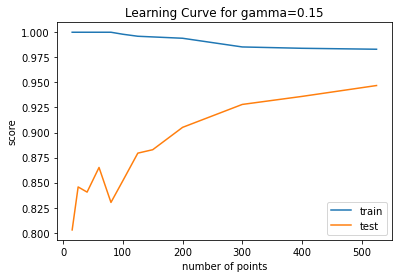

In [20]:
#part 4.2 gamma=0.15

#to store score
train_score = 0
test_score = 0
#to store Learning Curves
test_LC = []
train_LC = []

#choose gamma
gamma = 0.15
cls = Kfda(kernel='rbf', n_components=1, gamma = gamma)


for i in number_of_points:
    #reset the score list
    list_test_score = []
    list_train_score = []
    for j in range(0,10):
        #sample i random points from training set
        index = np.random.choice(range(training_set_features.shape[0]), i, replace=True)
        X_train = training_set_features[index]
        y_train = training_set_labels[index]
        
        #train
        cls.fit(X_train, y_train)
    
        #get score
        train_score = cls.score(X_train, y_train)
        test_score = cls.score(testing_set_features, testing_set_labels)
        #add score to list
        list_train_score.append(train_score)
        list_test_score.append(test_score)
    
    #add average of scores for to learning curve list for the plot
    train_LC.append(np.average(list_train_score))
    test_LC.append(np.average(list_test_score)) 

print(f'Average train Score: {np.average(train_LC)}')
print(f'Average test Score: {np.average(test_LC)}')

#plot    
plt.plot(number_of_points, train_LC, label ="train")
plt.plot(number_of_points, test_LC, label ="test")
plt.title(f'Learning Curve for gamma={gamma}')
plt.xlabel('number of points')
plt.ylabel('score')
plt.legend()
plt.show()

Average train Score: 0.9984910714285715
Average test Score: 0.8368095238095238


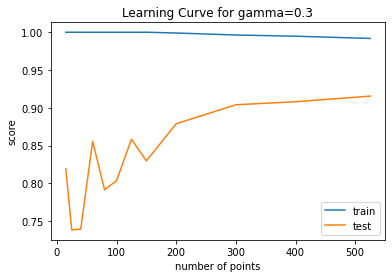

In [21]:
#part 4.2 gamma=0.3

#to store score
train_score = 0
test_score = 0
#to store Learning Curves
test_LC = []
train_LC = []

#choose gamma
gamma = 0.3
cls = Kfda(kernel='rbf', n_components=1, gamma = gamma)

for i in number_of_points:
    #reset the score list
    list_test_score = []
    list_train_score = []
    for j in range(0,10):
        #sample i random points from training set
        index = np.random.choice(range(training_set_features.shape[0]), i, replace=True)
        X_train = training_set_features[index]
        y_train = training_set_labels[index]
        
        #train
        cls.fit(X_train, y_train)
    
        #get score
        train_score = cls.score(X_train, y_train)
        test_score = cls.score(testing_set_features, testing_set_labels)
        #add score to list
        list_train_score.append(train_score)
        list_test_score.append(test_score)
    
    #add average of scores for to learning curve list for the plot
    train_LC.append(np.average(list_train_score))
    test_LC.append(np.average(list_test_score)) 

print(f'Average train Score: {np.average(train_LC)}')
print(f'Average test Score: {np.average(test_LC)}')

#plot    
plt.plot(number_of_points, train_LC, label ="train")
plt.plot(number_of_points, test_LC, label ="test")
plt.title(f'Learning Curve for gamma={gamma}')
plt.xlabel('number of points')
plt.ylabel('score')
plt.legend()
plt.show()

In [22]:
#part 4.3
#chosen gamma
gamma = 0.001
cls = Kfda(kernel='rbf', n_components=1, gamma = gamma)
cls.fit(training_set_features, training_set_labels)

#samples
sample_1 = np.array([[0],[1]])
sample_2 = np.array([[2],[3]])
sample_3 = np.array([[7],[0]])

#predictions
predict_1 = cls.predict(sample_1.transpose())
predict_2 = cls.predict(sample_2.transpose())
predict_3 = cls.predict(sample_3.transpose())

print(predict_1)
print(predict_2)
print(predict_3)

[1.]
[1.]
[1.]


In [23]:
#part 5.3
def separation_ratio(projected_data,labels):
    #reset lists
    arr_for_L0 = []
    arr_for_L1 = []
    #fill the two list with data based on label
    arr_for_L0 = [projected_data[i,0] for i in range(700) if labels[i]==0]
    arr_for_L1 = [projected_data[i,0] for i in range(700) if labels[i]==1]
    
    #calculate means
    mean_of_L0 = np.nanmean(arr_for_L0)
    mean_of_L1 = np.nanmean(arr_for_L1)
    #calculate variances
    var_of_L0 = np.nanvar(arr_for_L0)
    var_of_L1 = np.nanvar(arr_for_L1)
    
    #calculate D and S
    D = mean_of_L0 - mean_of_L1
    S = var_of_L0 + var_of_L1
    
    #R = D^2 / S
    return (D*D)/S

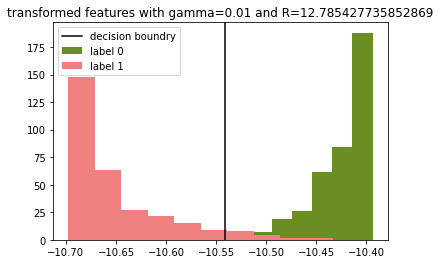

In [24]:
#part 5.1
gamma = 0.01
cls = Kfda(kernel='rbf', n_components=1, gamma = gamma)
cls.fit(training_set_features, training_set_labels)
xfda = Kfda.transform(cls, features)

#part 5.2
#reset lists
arr_for_L0 = []
arr_for_L1 = []
#fill the two list with data based on label
arr_for_L0 = [xfda[i,0] for i in range(700) if labels[i]==0]
arr_for_L1 = [xfda[i,0] for i in range(700) if labels[i]==1]

#part 5.3
R = separation_ratio(xfda, labels)

#part 6.1
mean_of_L0 = np.nanmean(arr_for_L0)
mean_of_L1 = np.nanmean(arr_for_L1)
decision_boundry = (mean_of_L0 + mean_of_L1)/2

plt.axvline(decision_boundry, c = 'black', label ='decision boundry')
plt.hist(arr_for_L0, color = "olivedrab", label ='label 0')
plt.hist(arr_for_L1, color = "lightcoral", label ='label 1')
plt.title(f'transformed features with gamma={gamma} and R={R}')
plt.legend()

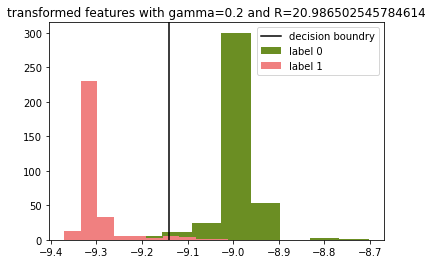

In [25]:
#gamma = 0.2
gamma = 0.2
cls = Kfda(kernel='rbf', n_components=1, gamma = gamma)
cls.fit(training_set_features, training_set_labels)
xfda = Kfda.transform(cls, features)

#reset lists
arr_for_L0 = []
arr_for_L1 = []
#fill the two list with data based on label
arr_for_L0 = [xfda[i,0] for i in range(700) if labels[i]==0]
arr_for_L1 = [xfda[i,0] for i in range(700) if labels[i]==1]

#part 5.3
R = separation_ratio(xfda, labels)

#part 6.1
mean_of_L0 = np.nanmean(arr_for_L0)
mean_of_L1 = np.nanmean(arr_for_L1)
decision_boundry = (mean_of_L0 + mean_of_L1)/2

plt.axvline(decision_boundry, c = 'black', label ='decision boundry')
plt.hist(arr_for_L0, color = "olivedrab", label ='label 0')
plt.hist(arr_for_L1, color = "lightcoral", label ='label 1')
plt.title(f'transformed features with gamma={gamma} and R={R}')
plt.legend()

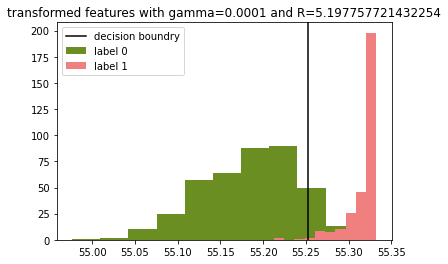

In [26]:
#gamma = 0.0001
gamma = 0.0001
cls = Kfda(kernel='rbf', n_components=1, gamma = gamma)
cls.fit(training_set_features, training_set_labels)
xfda = Kfda.transform(cls, features)

#reset lists
arr_for_L0 = []
arr_for_L1 = []
#fill the two list with data based on label
arr_for_L0 = [xfda[i,0] for i in range(700) if labels[i]==0]
arr_for_L1 = [xfda[i,0] for i in range(700) if labels[i]==1]

#part 5.3
R = separation_ratio(xfda, labels)

#part 6.1
mean_of_L0 = np.nanmean(arr_for_L0)
mean_of_L1 = np.nanmean(arr_for_L1)
decision_boundry = (mean_of_L0 + mean_of_L1)/2

plt.axvline(decision_boundry, c = 'black', label ='decision boundry')
plt.hist(arr_for_L0, color = "olivedrab", label ='label 0')
plt.hist(arr_for_L1, color = "lightcoral", label ='label 1')
plt.title(f'transformed features with gamma={gamma} and R={R}')
plt.legend()

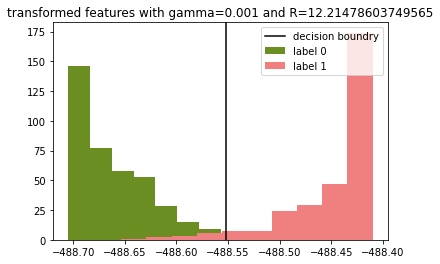

In [32]:
#gamma = 0.001
gamma = 0.001
cls = Kfda(kernel='rbf', n_components=1, gamma = gamma)
cls.fit(training_set_features, training_set_labels)
xfda = Kfda.transform(cls, features)

#reset lists
arr_for_L0 = []
arr_for_L1 = []
#fill the two list with data based on label
arr_for_L0 = [xfda[i,0] for i in range(700) if labels[i]==0]
arr_for_L1 = [xfda[i,0] for i in range(700) if labels[i]==1]

#part 5.3
R = separation_ratio(xfda, labels)

#part 6.1
mean_of_L0 = np.nanmean(arr_for_L0)
mean_of_L1 = np.nanmean(arr_for_L1)
decision_boundry = (mean_of_L0 + mean_of_L1)/2

plt.axvline(decision_boundry, c = 'black', label ='decision boundry')
plt.hist(arr_for_L0, color = "olivedrab", label ='label 0')
plt.hist(arr_for_L1, color = "lightcoral", label ='label 1')
plt.title(f'transformed features with gamma={gamma} and R={R}')
plt.legend()

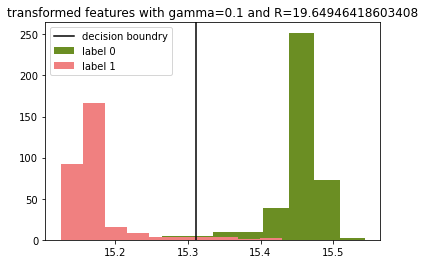

In [28]:
#gamma = 0.1
gamma = 0.1
cls = Kfda(kernel='rbf', n_components=1, gamma = gamma)
cls.fit(training_set_features, training_set_labels)
xfda = Kfda.transform(cls, features)

#reset lists
arr_for_L0 = []
arr_for_L1 = []
#fill the two list with data based on label
arr_for_L0 = [xfda[i,0] for i in range(700) if labels[i]==0]
arr_for_L1 = [xfda[i,0] for i in range(700) if labels[i]==1]

#part 5.3
R = separation_ratio(xfda, labels)

#part 6.1
mean_of_L0 = np.nanmean(arr_for_L0)
mean_of_L1 = np.nanmean(arr_for_L1)
decision_boundry = (mean_of_L0 + mean_of_L1)/2

plt.axvline(decision_boundry, c = 'black', label ='decision boundry')
plt.hist(arr_for_L0, color = "olivedrab", label ='label 0')
plt.hist(arr_for_L1, color = "lightcoral", label ='label 1')
plt.title(f'transformed features with gamma={gamma} and R={R}')
plt.legend()

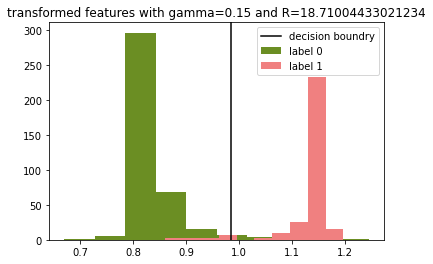

In [29]:
#gamma = 0.15
gamma = 0.15
cls = Kfda(kernel='rbf', n_components=1, gamma = gamma)
cls.fit(training_set_features, training_set_labels)
xfda = Kfda.transform(cls, features)

#reset lists
arr_for_L0 = []
arr_for_L1 = []
#fill the two list with data based on label
arr_for_L0 = [xfda[i,0] for i in range(700) if labels[i]==0]
arr_for_L1 = [xfda[i,0] for i in range(700) if labels[i]==1]

#part 5.3
R = separation_ratio(xfda, labels)

#part 6.1
mean_of_L0 = np.nanmean(arr_for_L0)
mean_of_L1 = np.nanmean(arr_for_L1)
decision_boundry = (mean_of_L0 + mean_of_L1)/2

plt.axvline(decision_boundry, c = 'black', label ='decision boundry')
plt.hist(arr_for_L0, color = "olivedrab", label ='label 0')
plt.hist(arr_for_L1, color = "lightcoral", label ='label 1')
plt.title(f'transformed features with gamma={gamma} and R={R}')
plt.legend()

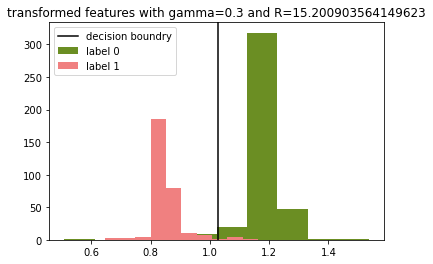

In [30]:
#gamma = 0.3
gamma = 0.3
cls = Kfda(kernel='rbf', n_components=1, gamma = gamma)
cls.fit(training_set_features, training_set_labels)
xfda = Kfda.transform(cls, features)

#reset lists
arr_for_L0 = []
arr_for_L1 = []
#fill the two list with data based on label
arr_for_L0 = [xfda[i,0] for i in range(700) if labels[i]==0]
arr_for_L1 = [xfda[i,0] for i in range(700) if labels[i]==1]

#part 5.3
R = separation_ratio(xfda, labels)

#part 6.1
mean_of_L0 = np.nanmean(arr_for_L0)
mean_of_L1 = np.nanmean(arr_for_L1)
decision_boundry = (mean_of_L0 + mean_of_L1)/2

plt.axvline(decision_boundry, c = 'black', label ='decision boundry')
plt.hist(arr_for_L0, color = "olivedrab", label ='label 0')
plt.hist(arr_for_L1, color = "lightcoral", label ='label 1')
plt.title(f'transformed features with gamma={gamma} and R={R}')
plt.legend()

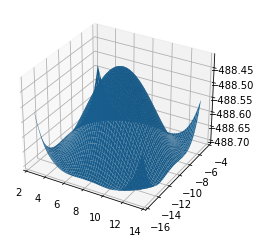

In [33]:
#part 6.2
#square grid vertices
X, Y = np.meshgrid(np.linspace(2.5, 13.5), np.linspace(-15.5, -4.5))
x_flattened = X.flatten()
y_flattened = Y.flatten()

#transform
mesh_transformed = cls.transform(list(zip(x_flattened, y_flattened)))

#plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, Y, mesh_transformed.reshape(X.shape))